## Importando bibliotecas

In [1]:
from datetime import datetime
import pandas as pd
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

## Lendo os dados

In [2]:
df = sgs.get({'IPCA': 433}, start='2015-01-01', end='2025-05-01')
df = df.reset_index()

In [3]:
df.head()

,Date,IPCA
0,2015-01-01,1.24
1,2015-02-01,1.22
2,2015-03-01,1.32
3,2015-04-01,0.71
4,2015-05-01,0.74


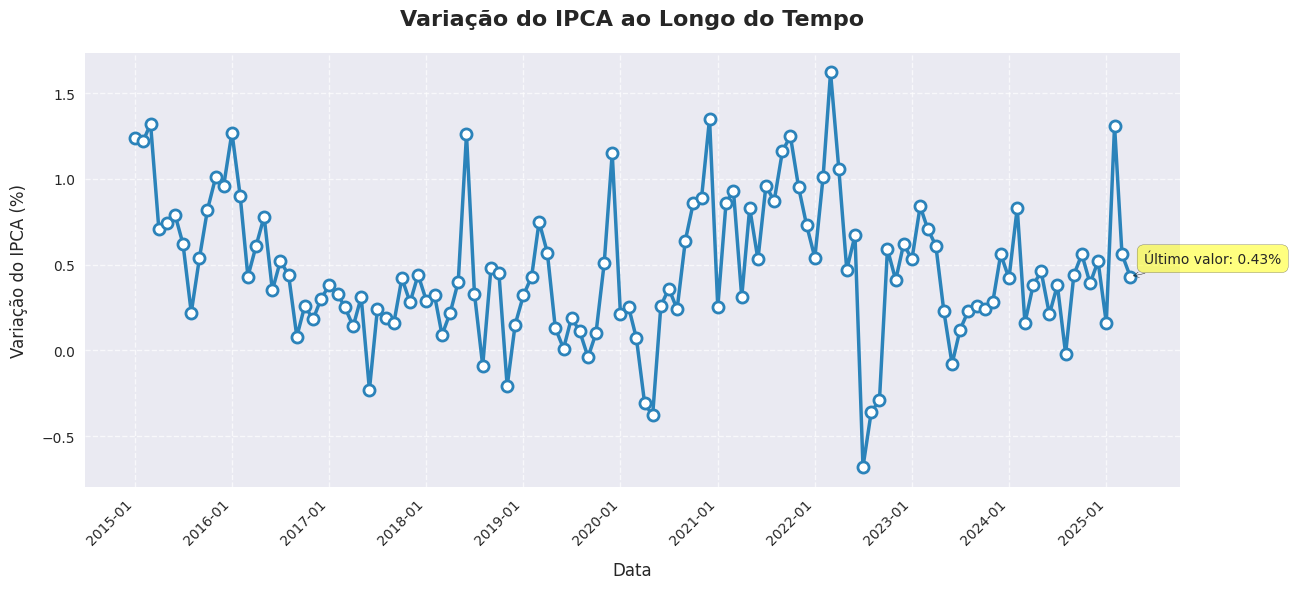

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurações gerais para melhorar a estética
plt.style.use('seaborn-v0_8')  

# Plotar os dados
plt.figure(figsize=(12, 6), dpi=100)

# Adicionar linha e marcadores
line = plt.plot(df['Date'], df['IPCA'], 
                marker='o', 
                markersize=8,
                markerfacecolor='white',
                markeredgewidth=2,
                linewidth=2.5,
                color='#2b83ba')

# Títulos e rótulos
plt.title('Variação do IPCA ao Longo do Tempo', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Data', fontsize=12, labelpad=10)
plt.ylabel('Variação do IPCA (%)', fontsize=12, labelpad=10)

# Formatação do eixo de datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato da data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Marcadores anuais
plt.xticks(rotation=45, ha='right')  # Rotacionar datas para melhor legibilidade

# Grade e eixos
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)  # Grid atrás dos dados

# Ajustar margens
plt.tight_layout()

# Adicionar anotação com o último valor
last_value = df['IPCA'].iloc[-1]
plt.annotate(f'Último valor: {last_value:.2f}%', 
             xy=(df['Date'].iloc[-1], last_value),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))

# Mostrar o gráfico
plt.show()